# 爬取CANDY构成，并画图展示其构成结构

今天看到币圈一个消息，CANDY要兑换成CANDYBOX。于是就顺便了解了一下，啥是**CANDY**，啥是**CANDYBOX**。

研究完发现，就是把一堆各种币放李老师那，李老师换一堆叫做CANDY的币出来，由出币的人发给大家打赏。
拿到打赏的人，就可以了用CANDY换各种东西，比如积分啥的。话说我好想就发现有积分可以用来换，而且好像还要动不动就清零。

近期李老师又出了ETF基金BOX，估计是之前的CANDY也属于ETF，于是就顺手改造一下，直接整成ETF在二级市场BigOne上交易，这样持有CANDY的人，就可以交易换USDT了。

在CANDY的官网上，有这么个网页：[https://candy.one/candy/box](https://candy.one/candy/box),公示CANDY盒子里面有多少币，以及这些币在二级市场的价值。

由于二级市场的价格一直都在变，所以这个总数也老是变。况且，表格类型的数据看起来也不容易理解。

这如何是好呢？

于是，我画了下面的图，方便查看CANDY构成币对应的金额结构。

![CANDY构成币的价值结构图](http://cdn.plmxs.top/MPic/20190810/fHihx9HYadpz.png?imageslim)

话不多说，上代码。

好多小伙伴看到了CANDY的图， 问我是怎么画的。我整理了一下，形成了此文。

**区块链研习社出品**
如果你也想和我一起学习，欢迎加入我的[Mixin群：https://mixin.one/codes/b2ab0dc7-21b5-470a-b4d4-e388b351f4f3](https://mixin.one/codes/b2ab0dc7-21b5-470a-b4d4-e388b351f4f3)。


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time 

In [2]:
%matplotlib inline

## 抽取candy的的数据
返回值为200说明抽取成功

In [3]:
r = requests.get('https://candy.one/api/asset')
r.status_code

200

解析获取到的json并填充到DataFrame里面。
看下数组形状。

In [4]:
data = r.json()
df = pd.DataFrame(data['data'])
# print(df.shape)
print('有',df.shape[0],'个币种。')

有 33 个币种。


## 计算币价总值

In [5]:
df['cny_total'] = df['amount']*df['cny_price']
cny_t = df['cny_total'].sum()
print('人民币计价总值为：',"{:.2f}".format(cny_t/10000),'万CNY。')

人民币计价总值为： 5842.52 万CNY。


In [6]:
df['usdt_total']=df['usdt_price']*df['amount']
usdt_total = df['usdt_total'].sum()
print('USDT计价总值为：',"{:.2f}".format(usdt_total/10000),'万USDT。')

USDT计价总值为： 832.55 万USDT。


按币价总值倒序排序，并用柱状图展示构成情况。

Text(20, 10000000, '共计币种：33\nCNY总价：5842.52万\nUSDT总价：832.55万\n-----By-----\nmixin ID:37326903\nWeChat:tecsonzhuang\n2019-08-10')

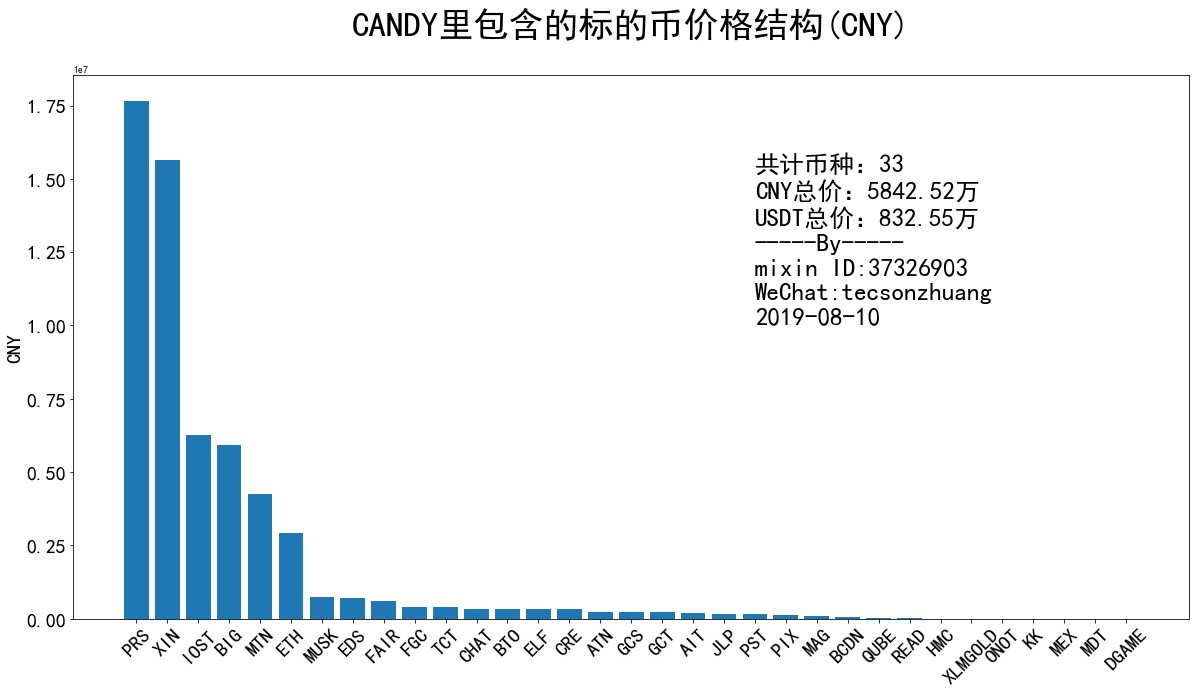

In [7]:
df1 = df.sort_values('cny_total', ascending=False)
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(20,10))
plt.bar(df1['code'],df1['cny_total'])
plt.ylabel('CNY',fontsize=20)
plt.title('CANDY里包含的标的币价格结构(CNY)\n',fontsize=35)
plt.xticks(df1['code'],rotation=45, fontsize=20)
plt.yticks(fontsize=20)
today = time.strftime("%Y-%m-%d", time.localtime()) 

t = "共计币种："+str(df.shape[0])
t += "\nCNY总价："+"{:.2f}".format(cny_t/10000)+"万"
t += "\nUSDT总价："+"{:.2f}".format(usdt_total/10000)+"万"
t += "\n-----By-----\nmixin ID:37326903\nWeChat:tecsonzhuang\n" + today

plt.text(20, 10000000, t, ha='left', wrap=True,fontsize=25)